In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [10]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")

data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [11]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, 
#### standard deviation for each pollutants verses county

#### Calculations for SO2 AQI:

In [12]:
# Group by County and aggregate mean, median, variance, standard deviation of the SO2 AQI (Sulphur dioxide Air Quality Index) for each County.
stat_so2_df = data_df.groupby(['County']).agg({'SO2 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_so2_df.head()

SO2 AQI                                           
                amax amin      mean median        var       std
County                                                         
Alameda         23.0  0.0  3.231041    3.0   9.527541  3.086671
Contra Costa    65.0  0.0  4.812092    3.0  26.090678  5.107904
Fresno          34.0  0.0  2.535538    1.0   6.501552  2.549814
Humboldt        37.0  0.0  0.839866    0.0   5.377260  2.318892
Imperial       153.0  0.0  3.255397    1.0  40.214900  6.341522

In [13]:
# Rename columns for mean, median, variance, standard deviation of the SO2 AQI (Sulphur dioxide Air Quality Index) for each County.

stat_so2_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']

In [14]:
# Resetting the Index

so2_df = stat_so2_df.reset_index()
so2_df.head()

,County,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,23.0,0.0,3.231041,3.0,9.527541,3.086671
1,Contra Costa,65.0,0.0,4.812092,3.0,26.090678,5.107904
2,Fresno,34.0,0.0,2.535538,1.0,6.501552,2.549814
3,Humboldt,37.0,0.0,0.839866,0.0,5.377260,2.318892
4,Imperial,153.0,0.0,3.255397,1.0,40.214900,6.341522


#### Visual Representation:

In [15]:
# Creating dataframe for two columns for plotting

max_so2_df = so2_df[['County', 'Mean']]
max_so2_df.head()

,County,Mean
0,Alameda,3.231041
1,Contra Costa,4.812092
2,Fresno,2.535538
3,Humboldt,0.839866
4,Imperial,3.255397


#### Creating bar plot for Counties Vs. Average Sulphur_dioxide Air Quality Index

<IPython.core.display.Javascript object>


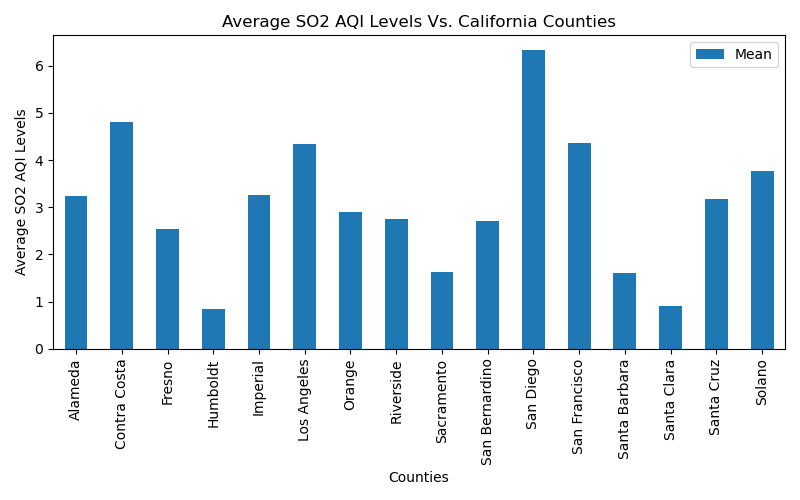

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
max_so2_df.plot(kind="bar", x='County', figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Average SO2 AQI Levels Vs. California Counties")
plt.xlabel("Counties")
plt.ylabel("Average SO2 AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/counties_so2.png')

#### Primary National Ambient Air Quality Standard (NAAQS) for Sulfur Dioxide ... The existing standard, established in 2010, is 75 parts per billion 

#### Average Sulphur-dioxide Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'San Diego' county has the  maximum of 8.631259 ppb